In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

data = pd.read_excel("pokemon_data.xlsx")

data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [11]:
#print(list(data["Name"]))  # truy xuất theo 1 cột

# cách 1: thông thường
#data[["Name", "Type 1"]][1:5]  # [start, end - 1]

# cách 2: sử dụng hàm loc[], iloc[]
data.iloc[1:5 , [1, 2] ]


,Name,Type 1
1,Ivysaur,Grass
2,Venusaur,Grass
3,VenusaurMega Venusaur,Grass
4,Charmander,Fire


In [21]:
# lấy ra những con nhân vật mà có chỉ số HP > 70
check = data["HP"] > 70
#data[check]

# cú pháp gộp
check = data[data["HP"] > 70][["Name", "HP"]]
#check

# sử dụng loc, iloc
check = data.loc[data["HP"] > 70 , ["Name", "HP"]]
check

,Name,HP
2,Venusaur,80
3,VenusaurMega Venusaur,80
6,Charizard,78
7,CharizardMega Charizard X,78
8,CharizardMega Charizard Y,78
...,...,...
793,Yveltal,126
794,Zygarde50% Forme,108
797,HoopaHoopa Confined,80
798,HoopaHoopa Unbound,80


In [32]:
# lấy ra những con nhân vật có hệ (Type 1) là Fire -> dataFire
# và có chỉ số Attack >= 80

# điều kiện số 1
dataFire = data.loc[data["Type 1"] == "Fire"]

# điều kiện số 2
dataAttack = dataFire.loc[dataFire["Attack"] >= 80]
dataAttack

# cách gộp
dataAttack_Fire = data.loc[(data["Type 1"] == "Fire") &
                           (data["Attack"] >= 80) ,
                           ["Name", "Type 1", "Attack"]]
dataAttack_Fire


,Name,Type 1,Attack
6,Charizard,Fire,84
7,CharizardMega Charizard X,Fire,130
8,CharizardMega Charizard Y,Fire,104
64,Arcanine,Fire,110
83,Ponyta,Fire,85
84,Rapidash,Fire,100
135,Magmar,Fire,95
147,Flareon,Fire,130
158,Moltres,Fire,100
171,Typhlosion,Fire,84


In [46]:
# Tìm hệ mà có chỉ số trung bình HP cao nhất 
"""
    1. Tính trung bình HP cho tất cả các hệ:   .mean() <-> average()
      - Fire:  65    
      - Water: 80
      - Electric: 70
      - .....
      
      1.1 Lấy ra list type1  -> OK
      1.2 Tính trung bình của từng type1 -> Dictionary
              {
                  "Water" : 80,
                  "Electric": 70,
                  ......
              
              }
      
      
    2. Tìm max của list vừa tạo  -> max()
    
"""

# Lấy ra danh sách các hệ
result = data["Type 1"].value_counts()
lst_type1 = list(result.index)
#print(lst_type1)

# Tính toán giá trị trung bình HP của từng hệ
dic_avg_hp = {}

for type1 in lst_type1:
    meanHP_value = data.loc[data["Type 1"] == type1, "HP"].mean()
    dic_avg_hp[type1] = meanHP_value   # update (key:value) vào dict

dic_avg_hp = dict(sorted(dic_avg_hp.items(), key = lambda x : x[1], reverse=True))
dic_avg_hp



{'Dragon': 83.3125,
 'Normal': 77.27551020408163,
 'Fairy': 74.11764705882354,
 'Ground': 73.78125,
 'Water': 72.0625,
 'Ice': 72.0,
 'Flying': 70.75,
 'Psychic': 70.63157894736842,
 'Fire': 69.90384615384616,
 'Fighting': 69.85185185185185,
 'Grass': 67.27142857142857,
 'Poison': 67.25,
 'Dark': 66.80645161290323,
 'Rock': 65.36363636363636,
 'Steel': 65.22222222222223,
 'Ghost': 64.4375,
 'Electric': 59.79545454545455,
 'Bug': 56.88405797101449}

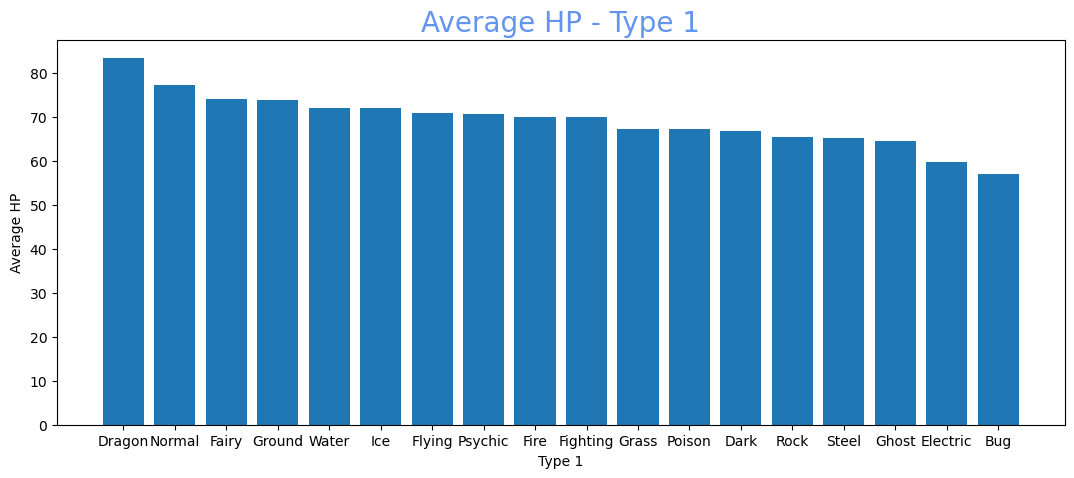

In [60]:
import matplotlib.pyplot as plt

# nguyên tắc vẽ biểu đồ
"""
    1. Chuẩn bị dữ liệu -> dưới dạng list 
    2. Chọn biểu đồ cần vẽ:   bar, plot, pie, scatter,...
    3. Xem cú pháp của biểu đồ: w3school 
    4. Vẽ
"""

# vẽ biểu đồ phù hợp để biểu diễn giá trị trung bình của các hệ trong data
data_type1 = list(dic_avg_hp.keys())  # -> list
data_mean = list(dic_avg_hp.values())  # -> list

plt.figure(figsize=(13, 5))
plt.bar(data_type1, data_mean)
plt.title("Average HP - Type 1", fontsize=20, color="#6495ED")
plt.xlabel("Type 1")
plt.ylabel("Average HP")


plt.show()

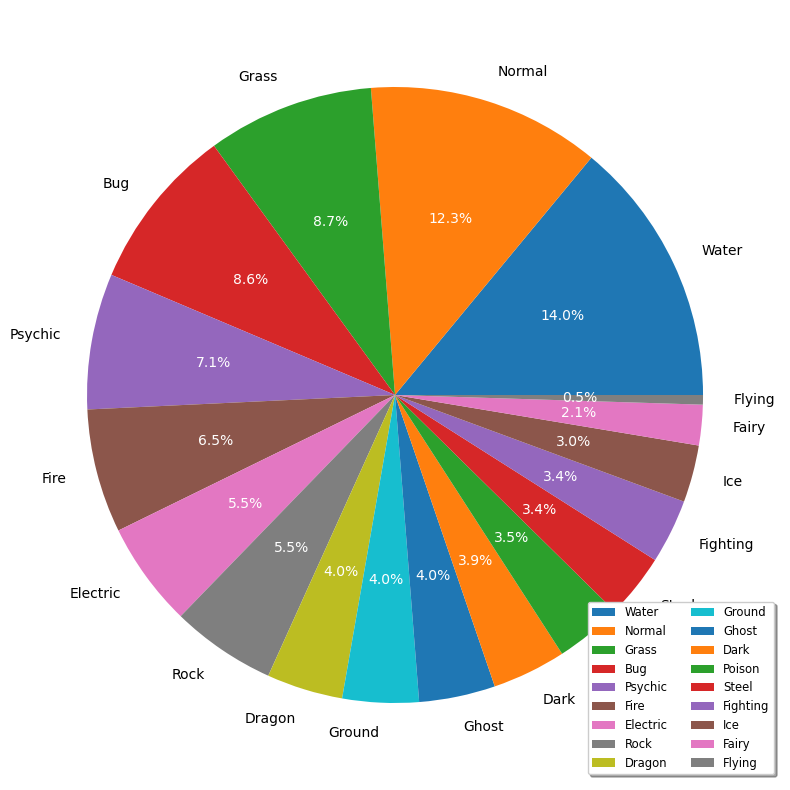

In [86]:
lst_count_type = data["Type 1"].value_counts()
type1 = list(lst_count_type.index)
value_counts = list(lst_count_type)

plt.figure(figsize=(10, 10))

_, _, autotexts = plt.pie(value_counts, labels = type1, autopct='%1.1f%%')
for autotext in autotexts:
    autotext.set_color('white')

plt.legend(loc="lower right", 
           ncol=2, fancybox=True, shadow=True, prop={'size':'small'})
plt.show()

